In [770]:
import spacy
import pandas as pd
import re
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
import numpy as np
import nltk
from sklearn.decomposition import NMF
import stylecloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nlp = spacy.load('en_core_web_sm')

In [771]:
tweets = pd.read_pickle(r'/Users/philliprichardson/Metis/Module 5/final df.pkl')

In [772]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)



In [773]:
stopwords = nltk.corpus.stopwords.words('english')

# Since all tweets are about E3, no real meaning with keeping these words.
updated_stopwords = ['e', 'e3', 'e32021', ' 2021', '2021 ','2021','2022', 'like', 'good', 'game', 'nintendoe3', 'of', 'fucking', 'conference']
stopwords.extend(updated_stopwords)


In [875]:
# Pre-Processing
hashtags = {'#taketwointeractive': 'Take Two Interactive', '#nintendodirect': 'Nintendo Direct', '#xboxbethesda': 'xbox bethesda', '#squareenixpresents': 'square enix presents', '#xbox20' : 'xbox 20', '#ubisoftforward' : 'ubisoft forward', 
            '#ubiforward': 'ubi forward', '#guardiansofthegalaxy': 'guardians of the galaxy', '#metroiddread': 'metroid dread', '#capcomshowcase': 'capcom showcase', '#capcome3': 'capcom e3', '#squareenix': 'square enix', 'squareenix': 'square enix',
           '#finalfantasy': 'final fantasy', '#haloinfinite': 'halo infinite', '#bethesdaxbox': 'bethesda xbox', '#xboxgamepass': 'xbox gamepass', '#forzahorizon5': 'forza horizon 5', 'bethesdaxbox': 'bethesda xbox', '#20xbox': '20 xbox',
           '#nintendotreehouselive': 'nintendo treehouse live', '#forwardubisoft': 'forward ubisoft', '#directnintendo': 'direct nintendo', '#nintendonintendo': 'nintendo', 'nintendonintendo': 'nintendo', 'directnintendo': 'direct nintendo',
           '#presentssquare': 'presents square', 'forwardubisoft': 'forward ubisoft'}


def tweet_clean(tweets):
    #lowercase tweets
    tweets_clean = tweets.lower()
    for key, value in hashtags.items():
        tweets_clean = tweets_clean.replace(key, value)
    #clean RTs
    tweets_clean = re.sub(r'^rt[\s]+', ' ', tweets_clean)
    #remove emojis and other unicode icons
    tweets_clean = emoji_pattern.sub(r' ', tweets_clean)
    #remove links
    tweets_clean = re.sub(r'https?:\/\/.*[\r\n]*', ' ', tweets_clean)
    #clean up hashtags
    tweets_clean = re.sub(r'#', ' ', tweets_clean)
    #remove single numbers
    tweets_clean = re.sub(r' [0-9] ', ' ', tweets_clean)
    #remove '...'
    tweets_clean = tweets_clean.replace('\u2026',' ')
    #Clean up amp which are ampersands, replace with and. Will get removed either way.
    tweets_clean = tweets_clean.replace('amp', ' ')
    #Remove most punctuation, ' is still included.
#     
    #remove stopwords list
    tweets_clean = ' '.join(word for word in tweets_clean.split() if word not in stopwords)

    return tweets_clean


In [876]:
tweets['cleaned'] = tweets.text.apply(lambda x: tweet_clean(x))


In [877]:
lst = []
check = tweets.cleaned.str.split('.')
check

for i in check:
    for j in i:
        if j != '':
            lst.append(j)
        


In [878]:
new_lst = []
for i in lst:
    new_lst.append(' '.join(word.strip(string.punctuation) for word in i.split()))

In [879]:
def topic_generation(text, vectorizer, topic_modeler, n_words = 7):
    doc_word_vectors = vectorizer.fit_transform(text)
    
    # Fit the topic model.
    doc_topic_vectors = topic_modeler.fit_transform(doc_word_vectors)
    
    # Print the topics.
    vocab = vectorizer.get_feature_names()
    for idx, topic in enumerate(topic_modeler.components_):
        # Select the top 15 words in vocab for this topic.
        top_words = [vocab[i].upper() for i in topic.argsort()[:-n_words-1:-1]]
        print(f"Topic {idx}:\n", ", ".join(top_words), "\n")
    
    return doc_topic_vectors

In [880]:
vectorizer = TfidfVectorizer(lowercase=False, max_df = .8, stop_words = updated_stopwords)
vectorizer2 = CountVectorizer(lowercase=False)
nmf = NMF(7)
lsa = TruncatedSVD(7)

### Baseline topics

In [863]:
topic_generation(tweets.cleaned, vectorizer, nmf, 20)

Topic 0:
 XBOX, BETHESDA, 20, SHOWCASE, STARFIELD, GAMEPASS, FORZA, PASS, COMING, LOOKS, GO, HORIZON, REDFALL, EXCLUSIVE, MICROSOFT, FRIDGE, OUTER, WORLDS, READY, SERIES 

Topic 1:
 NINTENDO, DIRECT, METROID, DREAD, ZELDA, BREATH, SWITCH, WILD, BOTW2, NEW, MARIO, SMASH, GO, WARS, ADVANCE, WARIOWARE, BOTW, WARIO, NINTENDOSWITCH, LOOKS 

Topic 2:
 SQUARE, ENIX, PRESENTS, GUARDIANS, GALAXY, FINAL, FANTASY, MARVEL, LOOKS, PRESENTATION, AVENGERS, LIFE, STRANGE, MOBILE, TIME, CHAOS, GO, ORIGIN, BABYLON, FALL 

Topic 3:
 NINTENDO, DIRECT, ANNOUNCED, DAYS, SAVE, SWITCH, SAVED, WINS, TOMORROW, 15, REVEALED, METROID, MARIO, TREEHOUSE, PLEASE, US, 10, LIVE, NINTENDOSWITCH, PRESENTATION 

Topic 4:
 FORWARD, UBISOFT, UBI, AVATAR, LOOKING, MARIO, LOOKS, RAINBOW, RABBIDS, FAR, SIX, EXTRACTION, CRY, FARCRY6, ROCKSMITH, LIVE, LOOK, RIDERSREPUBLIC, DANCE, MARIORABBIDS 

Topic 5:
 HALO, INFINITE, LOOKS, MULTIPLAYER, PLAY, FREE, FORZA, BATTLEFIELD, GAMEPLAY, HORIZON, GUARDIANS, AMAZING, GALAXY, HOLIDAY, T

array([[0.00050318, 0.00129006, 0.00039491, ..., 0.0010508 , 0.00034877,
        0.01415835],
       [0.        , 0.00045697, 0.00053693, ..., 0.00155539, 0.        ,
        0.01988028],
       [0.00026224, 0.        , 0.        , ..., 0.        , 0.00109232,
        0.        ],
       ...,
       [0.        , 0.        , 0.03743977, ..., 0.        , 0.        ,
        0.01116362],
       [0.00085751, 0.00138241, 0.00548814, ..., 0.00014112, 0.        ,
        0.01366679],
       [0.00053439, 0.        , 0.05740747, ..., 0.00123316, 0.00731092,
        0.01236551]])

### Sentence Documents instead of total tweet documents, much clearer topics compared to total tweet level docs

In [881]:
final = topic_generation(new_lst, vectorizer, nmf, 30)

Topic 0:
 XBOX, BETHESDA, 20, SHOWCASE, STARFIELD, GAMEPASS, MICROSOFT, PASS, FORZA, EXCLUSIVE, GO, XBOXSERIESX, SHOW, FRIDGE, REDFALL, READY, HORIZON, COMING, LET, SERIES, HADES, MINI, OUTER, WORLDS, BEST, XBOXE3, LIVE, BATTLEFIELD2042, STALKER, LETS 

Topic 1:
 NINTENDO, DIRECT, METROID, DREAD, BOTW2, ZELDA, NINTENDOSWITCH, BREATH, WILD, GO, SWITCH, SMASH, WARS, ADVANCE, MARIO, WARIOWARE, BOTW, SMASHBROSULTIMATE, WARIO, DIRECTE3, NEW, BREATHOFTHEWILD2, LET, KAZUYA, LIFE, BALL, PARTY, LIVE, STRANGE, FATAL 

Topic 2:
 SQUARE, ENIX, PRESENTS, GUARDIANS, GALAXY, FINAL, FANTASY, MARVEL, PRESENTATION, TIME, AVENGERS, SHOWCASE, LIVE, GO, LIFE, LET, STRANGE, CHAOS, MOBILE, SHOW, ORIGIN, NEXT, LIFEISSTRANGE, STRANGER, PARADISE, BABYLON, FALL, MINUTES, GOTG, FF 

Topic 3:
 NINTENDO, DIRECT, ANNOUNCED, DAYS, SWITCH, SAVE, TOMORROW, TODAY, WINS, SAVED, LIVE, METROID, 15, PLEASE, TREEHOUSE, US, REVEALED, YEAR, PRESENTATION, MARIO, ZELDA, NINTENDOSWITCH, DAY, LET, HOPE, 10, THANK, BOTW2, PREDICTIO

### Too much overlap in topics with LSA and TF-IDF

In [827]:
topic_generation(lst, vectorizer, lsa, 8)

Topic 0:
 XBOX, BETHESDA, 20, SHOWCASE, HALO, GAMES, SQUARE, INFINITE 

Topic 1:
 NINTENDO, DIRECT, NINTENDO, METROID, DIRECT, DREAD, NEW, BOTW2 

Topic 2:
 SQUARE, ENIX, PRESENTS, GUARDIANS, GALAXY, FINAL, NINTENDO, FANTASY 

Topic 3:
 NINTENDO, DIRECT, FORWARD, ANNOUNCED, UBISOFT, TODAY, DAYS, DAY 

Topic 4:
 FORWARD, UBISOFT, UBI, LOOKING, GAMES, AVATAR, LOOKS, NEW 

Topic 5:
 HALO, GAMES, LOOKS, CAPCOM, INFINITE, TODAY, NEW, SEE 

Topic 6:
 CAPCOM, SHOWCASE, GAMES, DAY, SHOW, TODAY, TIME, PRESENTATION 



array([[ 8.10434751e-03,  9.44451817e-03,  7.89695876e-03, ...,
         1.35190997e-02,  4.67824931e-02,  1.15625430e-02],
       [ 8.11577208e-03,  9.03038168e-03,  9.43860110e-03, ...,
         1.62051158e-02,  4.69919844e-02,  2.15821179e-02],
       [ 6.04741823e-03,  4.95271647e-03,  8.08373596e-03, ...,
         1.59320876e-02,  3.75346347e-02,  1.02907760e-02],
       ...,
       [ 1.31214469e-02,  9.51698505e-03,  2.23596277e-01, ...,
        -1.63034831e-04,  2.20247175e-02, -3.66965942e-05],
       [ 9.16784954e-03,  8.98075152e-03,  2.22659249e-02, ...,
         1.18240056e-02,  5.86448359e-02,  7.15581051e-03],
       [ 2.19166118e-02,  1.39311997e-02,  3.10592020e-01, ...,
         6.46050472e-03,  9.39868130e-02, -4.59298804e-02]])

### Less meaningfull words in some of the topics, like 1 and 0 for Count Vectorizer and NMF

In [828]:
topic_generation(lst, vectorizer2, nmf, 8)

Topic 0:
 XBOX, BETHESDA, 20, SHOWCASE, HALO, STARFIELD, GAMEPASS, SHOW 

Topic 1:
 NINTENDO, DIRECT, ANNOUNCED, 2021, DAYS, TODAY, SWITCH, DAY 

Topic 2:
 SQUARE, ENIX, PRESENTS, GUARDIANS, GALAXY, FINAL, FANTASY, MARVEL 

Topic 3:
 NINTENDO, DIRECT, METROID, ZELDA, SWITCH, BOTW2, DREAD, SMASH 

Topic 4:
 FORWARD, UBISOFT, UBI, LOOKING, AVATAR, LIVE, TODAY, FAR 

Topic 5:
 GAMES, TODAY, SHOW, SHOWCASE, VIDEO, DAY, SEE, ONE 

Topic 6:
 NEW, LOOKS, HALO, INFINITE, METROID, TRAILER, GAME, SEE 



array([[1.53848279e-03, 2.00815479e-03, 1.40149789e-03, ...,
        3.21000991e-03, 1.61551622e-02, 1.71397752e-02],
       [1.21289095e-03, 2.54656250e-03, 1.80351121e-03, ...,
        5.10192058e-03, 1.12808535e-02, 9.72404267e-03],
       [3.12705623e-04, 3.39293114e-04, 5.87442303e-04, ...,
        1.57717612e-03, 3.34889226e-03, 3.48014378e-03],
       ...,
       [0.00000000e+00, 5.78632673e-05, 1.11002462e-01, ...,
        1.07253311e-03, 6.83630155e-03, 8.47544287e-03],
       [0.00000000e+00, 0.00000000e+00, 7.42476281e-03, ...,
        0.00000000e+00, 8.12654010e-04, 9.68128676e-02],
       [0.00000000e+00, 0.00000000e+00, 1.20347059e-01, ...,
        0.00000000e+00, 0.00000000e+00, 4.87349047e-02]])

### Way too much overlap in topics in Count Vectorizer and LSA

In [829]:
topic_generation(lst, vectorizer2, lsa, 8)

Topic 0:
 XBOX, BETHESDA, 20, GAMES, SHOWCASE, HALO, SQUARE, NINTENDO 

Topic 1:
 NINTENDO, NINTENDO, DIRECT, DIRECT, ANNOUNCED, 2021, NEW, TODAY 

Topic 2:
 SQUARE, ENIX, PRESENTS, GUARDIANS, GALAXY, FINAL, FANTASY, GAMES 

Topic 3:
 NINTENDO, DIRECT, 2021, ANNOUNCED, DAYS, 15, REVEALED, SQUARE 

Topic 4:
 FORWARD, UBISOFT, GAMES, NEW, UBI, TODAY, LOOKS, SEE 

Topic 5:
 GAMES, NEW, HALO, SEE, LOOKS, TODAY, INFINITE, VIDEO 

Topic 6:
 GAMES, SHOWCASE, FORWARD, UBISOFT, SHOW, NINTENDO, DIRECT, VIDEO 



array([[ 0.06620062,  0.09499934,  0.04553832, ...,  0.1901262 ,
         0.15049751, -0.02494952],
       [ 0.04920377,  0.07936383,  0.04136137, ...,  0.15549675,
         0.07146399, -0.02888717],
       [ 0.01427358,  0.01852488,  0.01416428, ...,  0.04872077,
         0.02122249, -0.01354527],
       ...,
       [ 0.10283398,  0.1553387 ,  1.30991737, ..., -0.04089437,
         0.03135191, -0.00880775],
       [ 0.07791947,  0.12441883,  0.15887847, ...,  0.33855615,
         0.41504152, -0.4289005 ],
       [ 0.13128049,  0.17385908,  1.45398236, ...,  0.01870867,
         0.08817266, -0.37157244]])

## Moving onto topic assignment

In [882]:
topic_map = {0: 'Xbox', 1: 'Nintendo (post-presentation)', 3:'Nintendo (pre-presentation)', 2: 'Square Enix', 4: 'Ubisoft', 5: 'General E3', 6: 'Capcom'}

topics = pd.DataFrame(new_lst, columns = ['Tweet'])

topics['topic'] = final.argmax(axis = 1)

topics[['Xbox', 'Nintendo (post-presentation)', 'Nintendo (pre-presentation)', 'Square Enix', 'Ubisoft', 'Misc','Capcom' ]] = final

topics['topic'] = topics.topic.apply(lambda x: topic_map[x])

## Not particularly surprising, but ~62% of documents are not related to the other top 6 topics. E3 covers a LARGE array of video game topics that aren't as large as the topics measured here, also many people react directly about E3 instead of a specific game.

In [883]:
topics.topic.value_counts()

General E3                      104188
Xbox                             20452
Nintendo (pre-presentation)      10767
Nintendo (post-presentation)      9763
Ubisoft                           8036
Square Enix                       7444
Capcom                            6650
Name: topic, dtype: int64

In [884]:
gen_e3 = topics[(topics.topic == 'General E3')]
xbox = topics[(topics.topic == 'Xbox')]
SE = topics[(topics.topic == 'Square Enix')]
nin_post = topics[(topics.topic == 'Nintendo (post-presentation)')]
ubi = topics[(topics.topic == 'Ubisoft')]
nin_pre = topics[(topics.topic == 'Nintendo (pre-presentation)')]
capcom = topics[(topics.topic == 'Capcom')]

In [923]:
stopwords.extend(['presentation', 'present', 'showcase', 'presents', 'announcement', 'announced', 'show', 'look', 'looking', '.'])

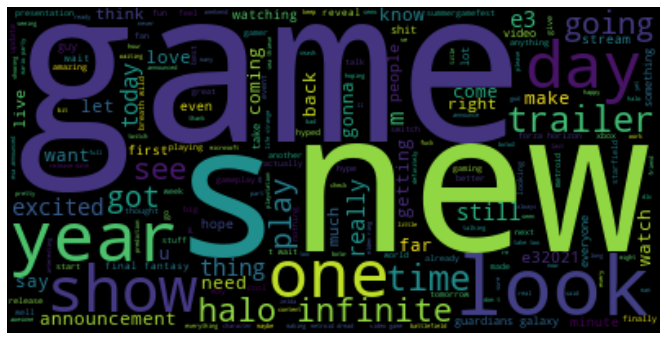

In [947]:
wordcloud = WordCloud().generate(''.join(gen_e3.Tweet))

# Display the generated image:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.savefig("/Users/philliprichardson/Metis/Module 5/general e3",bbox_inches='tight')

## Xbox

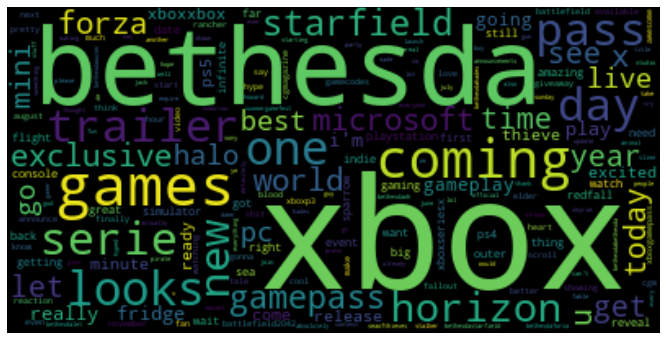

In [954]:
stopwords_x = stopwords
stopwords_x.append('bethesdaxbox')
stopwords_x.append('20xbox')

wordcloud = WordCloud(collocations = False, stopwords = stopwords_x).generate(''.join(xbox.Tweet))

# Display the generated image:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("/Users/philliprichardson/Metis/Module 5/xbox e3",bbox_inches='tight')

## Square Enix

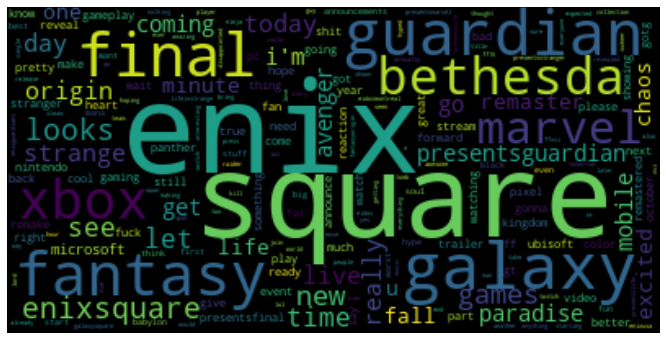

In [955]:
stopwords_se = stopwords
stopwords_se.append('presentssquare')

wordcloud = WordCloud(collocations = False, stopwords = stopwords_se).generate(''.join(SE.Tweet))

# Display the generated image:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("/Users/philliprichardson/Metis/Module 5/se e3",bbox_inches='tight')

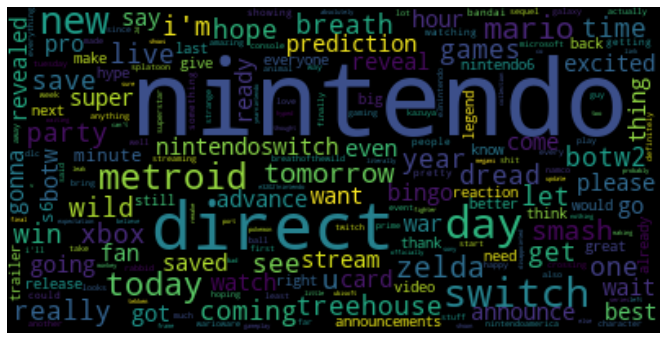

In [956]:
stopwords_nin = stopwords
stopwords_nin.append('DirectNintendo')
stopwords_nin.append('nintendonintendo')

wordcloud = WordCloud(collocations = False, stopwords = stopwords_nin).generate(''.join(nin_pre.Tweet.str.replace('nintendonintendo', 'nintendo')))


#Display the generated image:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("/Users/philliprichardson/Metis/Module 5/nintendo pre e3",bbox_inches='tight')

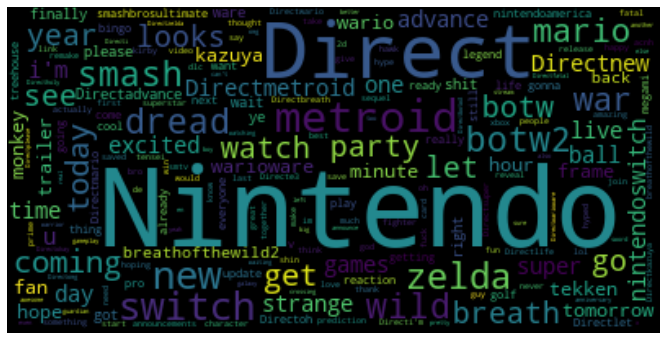

In [957]:

wordcloud = WordCloud(collocations = False, stopwords = stopwords_nin).generate(''.join(nin_post.Tweet))

# Display the generated image:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("/Users/philliprichardson/Metis/Module 5/nintendo post e3",bbox_inches='tight')

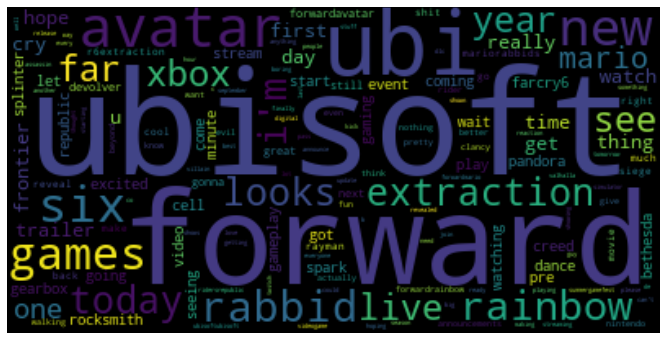

In [958]:
stopwords_u = stopwords
stopwords_u.extend(['forwardubisoft', 'forwardubi'])

wordcloud = WordCloud(collocations = False, stopwords = stopwords).generate(''.join(ubi.Tweet))

# Display the generated image:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("/Users/philliprichardson/Metis/Module 5/ubisoft e3",bbox_inches='tight')

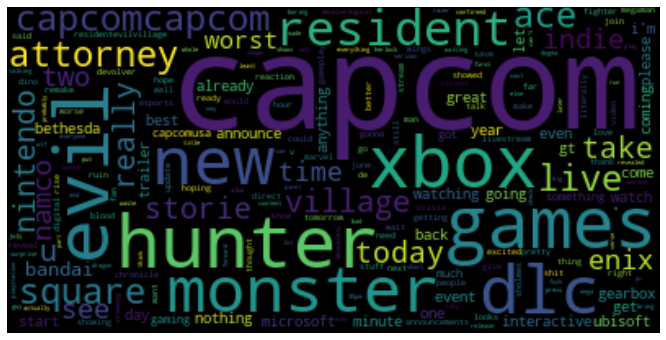

In [959]:
stopwords_u = stopwords
stopwords_u.extend(['showcasecapcom'])

wordcloud = WordCloud(collocations = False, stopwords = stopwords).generate(''.join(capcom.Tweet))

# Display the generated image:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("/Users/philliprichardson/Metis/Module 5/capcom e3",bbox_inches='tight')